In [ ]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import math
import nltk

# load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel('/content/drive/My Drive/DL final/data/final_final_result.xlsx')

In [ ]:
df.head(5)

,comment,sentiment
0,Did he come around?,neutral
1,Why did she smile 😢,neutral
2,When i found my lost toy after 12 years later,positive
3,HAHAHAHA,positive
4,"She is an EXCEPTIONAL JUDGE, I love her respec...",positive


In [ ]:
# Pick any random Review

df['comment'][3]

'HAHAHAHA'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77510 entries, 0 to 77509
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comment    77510 non-null  object
 1   sentiment  77492 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


## Preprocess

### Remove HTML tags, URLs, non-alphanumeric characters & Convert to lowercasev

In [ ]:
df.head()

,comment,sentiment
0,Did come around?,neutral
1,Why smile 😢,neutral
2,When found lost toy 12 year later,positive
3,HAHAHAHA,positive
4,"She EXCEPTIONAL JUDGE, I love respect people, ...",positive


In [ ]:
import re



def remove_tags(string):
    removelist = ''# Add any characters you'd like to keep
    # Remove HTML tags

    result = re.sub(r'<[^>]+>', '', string)

    # Convert to lowercase

    result = result.lower()

    # Remove URLs

    result = re.sub(r'https?://\S+', '', result)

    # Remove non-alphanumeric characters (except for those in the removelist)

    result = re.sub(r'[^a-zA-Z0-9' + removelist + r'\s]', ' ', result)

    return result


In [ ]:
# Function to remove rows where comment is only numbers or whitespace
def remove_empty_or_numeric_rows(df):
    df['cleaned_comment'] = df['comment'].apply(remove_tags)
    df = df[df['cleaned_comment'].str.strip().str.match(r'^[0-9\s]+$') == False]
    df = df.drop(columns=['cleaned_comment'])

    return df

In [ ]:
def clean_comments_column(df, column_name):
    df[column_name] = df[column_name].astype(str)
    cleaned_df = df[(df[column_name] != 'nan') & (df[column_name] != '')]

    return cleaned_df

In [ ]:
# Apply Function to Remove HTML Tags in our Dataset Colum Review.

df['comment'] = df['comment'].apply(remove_tags)

In [ ]:
df.head(20)

,comment,sentiment
0,did come around,neutral
1,why smile,neutral
2,when found lost toy 12 year later,positive
3,hahahaha,positive
4,she exceptional judge i love respect people ...,positive
5,the coolest kid middle school,positive
6,maybe needed reminder that nicest kid middle...,neutral
7,this real scenery world best justice,positive
8,judge golden heart,positive
9,he 39 s upset become criminal upset become...,negative


In [ ]:
df = df.loc[df['comment'].str.strip() != '']

In [ ]:
df = remove_empty_or_numeric_rows(df)

In [ ]:
df.head(20)

,comment,sentiment
0,did come around,neutral
1,why smile,neutral
2,when found lost toy 12 year later,positive
3,hahahaha,positive
4,she exceptional judge i love respect people ...,positive
5,the coolest kid middle school,positive
6,maybe needed reminder that nicest kid middle...,neutral
7,this real scenery world best justice,positive
8,judge golden heart,positive
9,he 39 s upset become criminal upset become...,negative


In [ ]:
df = df.loc[df['comment'].str.strip() != '']

In [ ]:
df.head(20)

,comment,sentiment
0,did come around,neutral
1,why smile,neutral
2,when found lost toy 12 year later,positive
3,hahahaha,positive
4,she exceptional judge i love respect people ...,positive
5,the coolest kid middle school,positive
6,maybe needed reminder that nicest kid middle...,neutral
7,this real scenery world best justice,positive
8,judge golden heart,positive
9,he 39 s upset become criminal upset become...,negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77434 entries, 0 to 77509
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comment    77434 non-null  object
 1   sentiment  77416 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [ ]:
df = clean_comments_column(df, 'comment')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77434 entries, 0 to 77509
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comment    77434 non-null  object
 1   sentiment  77416 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.head(20)

,comment,sentiment
0,did come around,neutral
1,why smile,neutral
2,when found lost toy 12 year later,positive
3,hahahaha,positive
4,she exceptional judge i love respect people ...,positive
5,the coolest kid middle school,positive
6,maybe needed reminder that nicest kid middle...,neutral
7,this real scenery world best justice,positive
8,judge golden heart,positive
9,he 39 s upset become criminal upset become...,negative


In [ ]:
df['comment'][666]

'she smiling like got back something might done school '

### Remove stopwords

In [ ]:
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


df['comment'] = df['comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['comment'][666]

'This genuinely heart breaking, glad free well.'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77510 entries, 0 to 77509
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comment    77510 non-null  object
 1   sentiment  77492 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [ ]:
#delete all rows cotain empty comment
df = df.loc[df['comment'].str.strip() != '']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77500 entries, 0 to 77509
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comment    77500 non-null  object
 1   sentiment  77482 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [ ]:
df['comment'][677]

'Get grip, man'

In [ ]:
import nltk

from nltk.tokenize import WhitespaceTokenizer

from nltk.stem import WordNetLemmatizer



# Download required NLTK resources

nltk.download('wordnet')

nltk.download('omw-1.4')



# Initialize tokenizer and lemmatizer

w_tokenizer = WhitespaceTokenizer()

lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### lemmatization

In [ ]:
# Define the lemmatization function

def lemmatize_text(text):

    # Tokenize and lemmatize in a single step using a list comprehension

    lemmatized = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

    # Join the lemmatized tokens back into a string

    return ' '.join(lemmatized)



# Apply the function to the 'comment' column

df['comment'] = df['comment'].apply(lemmatize_text)


In [ ]:
#Initialize a variable to store the total word count
s = 0.0

#loop through comment
for i in df['comment']:

    # Split the comment into a list of words

    word_list = i.split()

    # Add the number of words in the current comment to the total word count

    s = s + len(word_list)



# Calculate the average commnent lengt

print("Average length of each comment : ", s / df.shape[0])





Average length of each comment :  11.385148387096773


In [ ]:
df.head()

,comment,sentiment
0,Did come around?,neutral
1,Why smile 😢,neutral
2,When found lost toy 12 year later,positive
3,HAHAHAHA,positive
4,"She EXCEPTIONAL JUDGE, I love respect people, ...",positive


## Save file

In [ ]:
file_path = '/content/drive/My Drive/DL final/data/afterlabel.xlsx'

In [ ]:
df.to_excel(file_path, index=False)

### Biểu đồ phân phối của sentiment

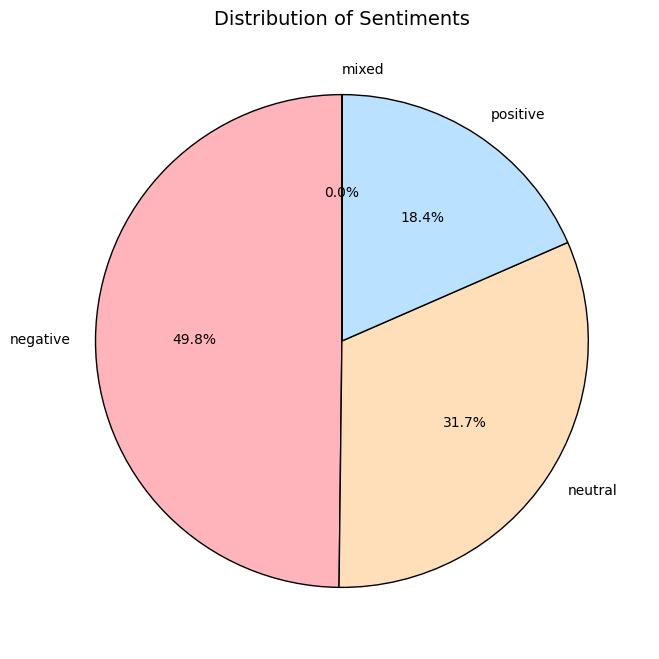

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='pie',
                      autopct='%1.1f%%',
                      startangle=90,
                      colors=['#FFB3BA', '#FFDFBA', '#BAE1FF'],
                      wedgeprops={'edgecolor': 'black'})

plt.title('Distribution of Sentiments', fontsize=14)
plt.ylabel('')  # Remove the default y-label
plt.show()